
# Classifying data from Iris( the famous flower data set) into multiple classes.


Introduction to the Iris Data Set

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

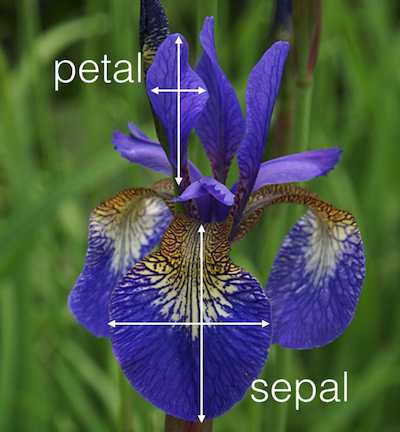

In [6]:
# The Iris Sepals and Petals
from IPython.display import Image
url = 'http://irisabramson.com/wp-content/uploads/2014/10/iris_petal_sepal.png'
Image(url,width=300, height=300)

# Data Formatting 





In [7]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [8]:
#load the data set from Scit Kit Learn

In [9]:
from sklearn import linear_model
from sklearn.datasets import load_iris

# Import the data
iris = load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target

# Show the Built-in Data Description
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
# Grab data
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

# Grab Target
iris_target = DataFrame(Y,columns=['Species'])

If we look at the iris_target data, we'll notice that the Species are still defined as either 0,1,or 2. Let's go ahead and use apply() to split the column, apply a naming scheme function, and then combine it back together.

In [11]:
def flower(num):
    ''' Takes in numerical class, returns flower name'''
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

# Apply
iris_target['Species'] = iris_target['Species'].apply(flower)

In [12]:
#Check
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [13]:
# Create a combined Iris DataSet
iris = pd.concat([iris_data,iris_target],axis=1)

# Preview all data
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Data Visualization Analysis

Let's do some quick visualizations of the data to see if there are any correlations between all the varibles.

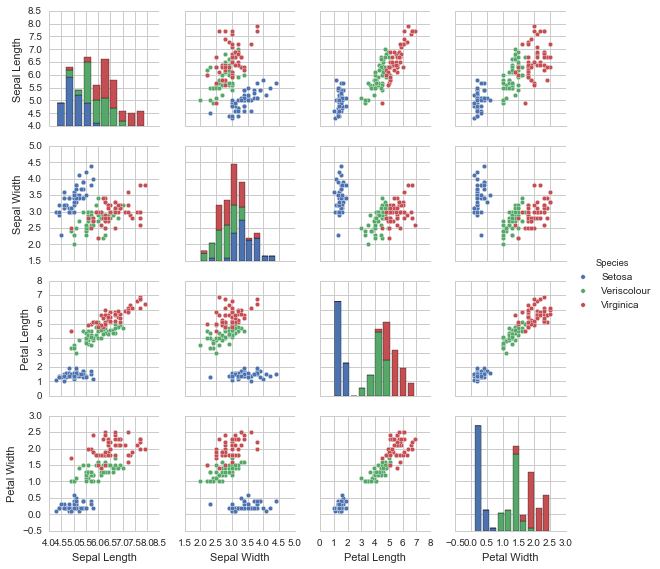

In [14]:
# First a pairplot of all the different features
sns.pairplot(iris,hue='Species',size=2)

Overall, all the features among these three types are relatively distinct from each other. Particuallry, Setosa has the most distinct features out of the three types. 

Now let's take a close look at the petal length distrubutions for all three species. 

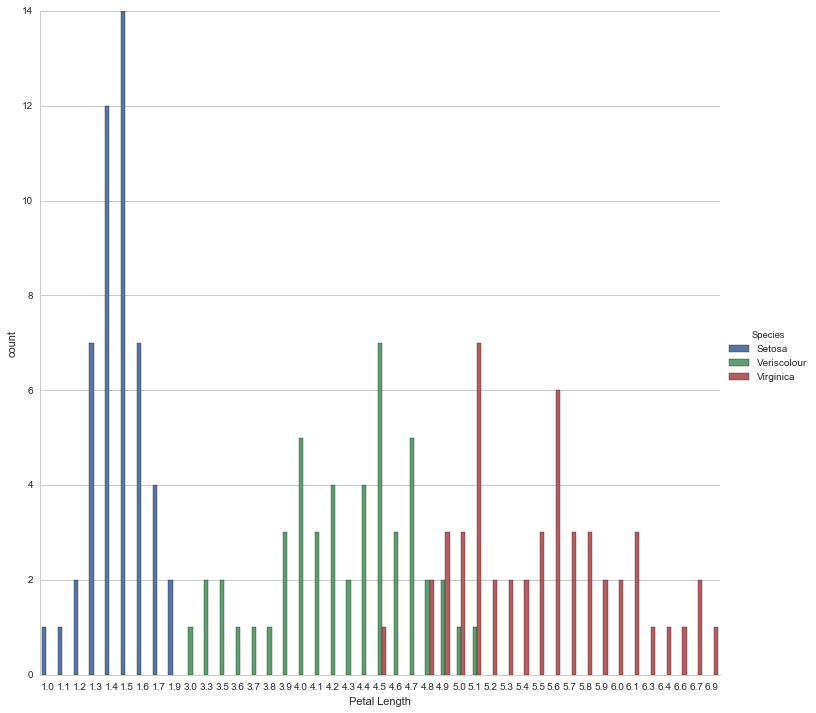

In [17]:
sns.factorplot('Petal Length',data=iris,hue='Species',size=10,kind="count")
 


I'm also curious about the Sepal Width. Let's plot "Sepal Width"

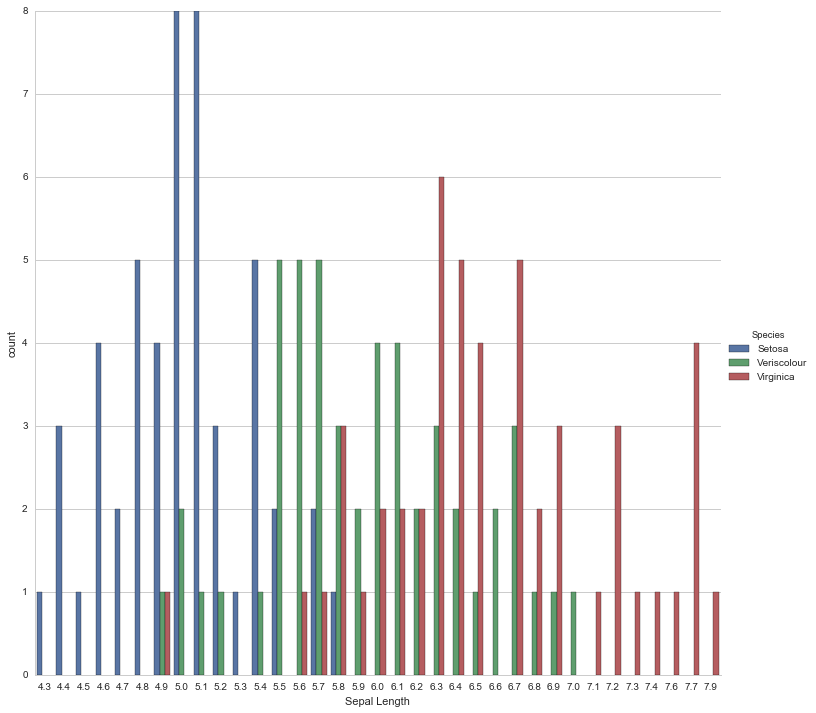

In [18]:
sns.factorplot('Sepal Length',data=iris,hue='Species',size=10,kind="count")


This feature is not as distinct as other features. I also noticied that Sepal Length for each speccies all has a normal distribution


# Multi-Class Classification with Sci Kit Learn

Let's go ahead and start using SciKit Learn to perform a Multi-Class Classification using Logistic Regression Techniques.

We already have X and Y defined as the Data Features and Target so let's go ahead and continue with those arrays. We will then have to split the data into Testing and Training sets. I'll pass a test_size argument to have the testing data be 40% of the total data set. I'll also pass a random seed number.

In [19]:
# Import SciKit Learn Log Reg
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# Create a Logistic Regression Class object
logreg = LogisticRegression()

# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=3)

# Train the model with the training set
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
# Import testing metrics from SciKit Learn
from sklearn import metrics

# Prediction from X_test
Y_pred = logreg.predict(X_test)

#Check accuracy
print metrics.accuracy_score(Y_test,Y_pred)

0.933333333333


Looks like our model had almost 93% accuracy. 

But I'm curious what would the best test_size be? Let's use a for loop to try out different test_size, and find out.

In [40]:
test_size_range=np.arange(0.25,0.5,0.01)

accuracy=[]

for size in test_size_range:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size,random_state=3)
    logreg.fit(X_train, Y_train)
    Y_pred = logreg.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))
    

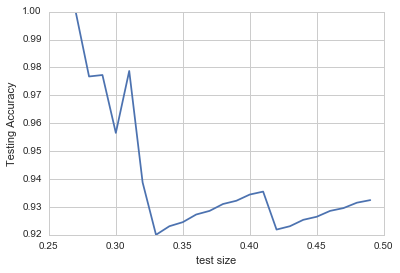

In [41]:
plt.plot(test_size_range, accuracy)
plt.xlabel('test size')
plt.ylabel('Testing Accuracy')


It seems the test size of 0.3 has the highest accuracy, which is almost 1. However, after a rapid drop, Testing Accuracy reached to another local peak, which is around 0.935. In this case, I will pick 0.42 as my test size 

# K-Nearest Neighbors

Let's start with a basic overview of the K-Nearest Neighbors Algorithm. The premise of the algorithm is actually quite simple. Given an object to be assigned to a class in a feature space, select the class that is "nearest" to the negihbors in the training set. This 'nearness" is a distance metric, which is usually a Euclidean distance.

Below is a quick explaination about K-Nearest Neighbors

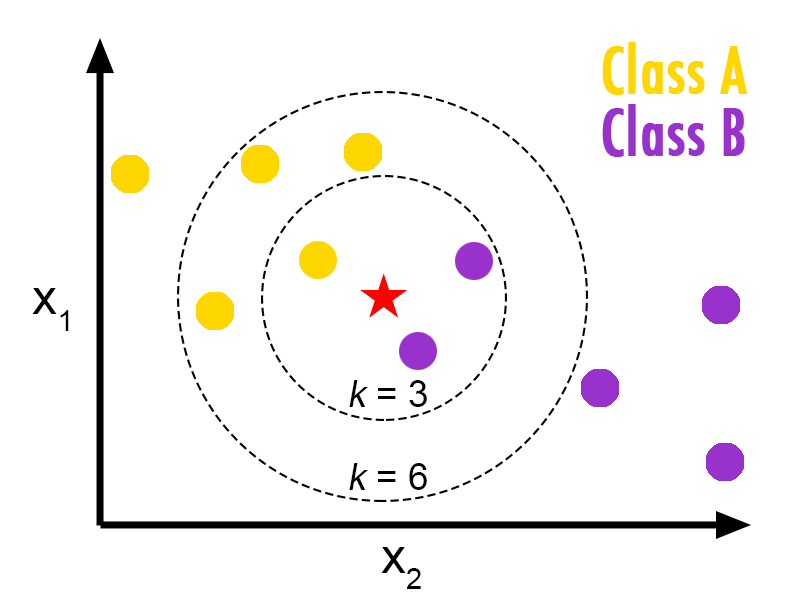

In [47]:
Image('http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png',width=400, height=300)



Imagine we have two Classes in our training set, A and B. Then we have to classify a new data point in our testing data, we represent this as a red star. Now we just expand a specific distance away from our feature space until we hit k number of other data points. In the figure above you can see the differences between various k values. An important thing to note, for a binary classification using this method, we must choose an odd number for k, to avoid the case of a "tied" distance between two classes.


# kNN with SciKit Learn

In [48]:
#Import from SciKit Learn
from sklearn.neighbors import KNeighborsClassifier

# We'll first start with k=6

# Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the data
knn.fit(X_train,Y_train)

# Run a prediction
Y_pred = knn.predict(X_test)

# Check Accuracy against the Testing Set
print metrics.accuracy_score(Y_test,Y_pred)

0.959459459459


Looks like using k=6 got us around 95% accuracy. Let's see what happens if we reduce that value to k=1, that means the closest point in the feature space to our testing data point will be the class the testing point joins.

In [49]:
# Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit the data
knn.fit(X_train,Y_train)

# Run a prediction
Y_pred = knn.predict(X_test)

# Check Accuracy against the Testing Set
print metrics.accuracy_score(Y_test,Y_pred)

0.959459459459


Looks like using k=1 got us around 96% accuracy. How about we cycle through various k values and find the optimal value.

In [50]:
# Test k values 1 through 20
k_range = range(1, 21)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Now let's plot the results!

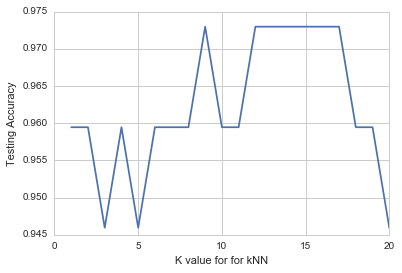

In [52]:
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

Awesome! Looks like K-Nearest Neighbors is able to give us a higher accuracy in general. 